In [ ]:
#import modules - AFFINITY PROPAGATION
#WILLIAM JONATHAN M , NIM: 2502045683
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
import numpy as np

In [ ]:
#reading the data from the csv file
df = pd.read_csv('10YearPeriodHIV.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               75 non-null     object 
 1   Period2011             75 non-null     int64  
 2   ART coverage 2011      75 non-null     float64
 3   Death by HIV 2011      75 non-null     float64
 4   People with HIV 2011   75 non-null     float64
 5   Total Population 2011  75 non-null     float64
 6   Period2012             75 non-null     int64  
 7   ART coverage 2012      75 non-null     float64
 8   Death by HIV 2012      75 non-null     float64
 9   People with HIV 2012   75 non-null     float64
 10  Total Population 2012  75 non-null     float64
 11  Period2013             75 non-null     int64  
 12  ART coverage 2013      75 non-null     float64
 13  Death by HIV 2013      75 non-null     float64
 14  People with HIV 2013   75 non-null     float64
 15  Total Po

    Total Population 2021  People with HIV 2021
0               1449891.0               66000.0
1               9749625.0               13000.0
2              33933611.0              320000.0
3               8141343.0               76000.0
4               1883162.0                7800.0
5              18275704.0                 810.0
6               2015490.0               40000.0
7               5180208.0               34000.0
8              19002586.0               35000.0
9                888456.0                 200.0
10             11935764.0                5400.0
11              4775110.0                9400.0
12               902899.0                1400.0
13             51265841.0              170000.0
14             39835428.0               11000.0
15             32776195.0               82000.0
16             27224262.0              500000.0
17              9340314.0               28000.0
18              2811666.0                1400.0
19              6702379.0               

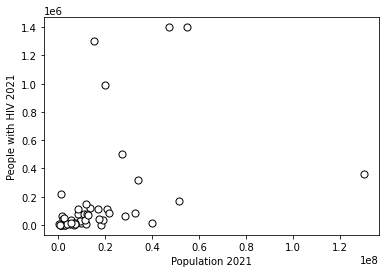

In [ ]:
X = df.iloc[:50,[55,54]]
print(X)
# X = df.iloc[30:81,[1,7]]
#plotting
x_= df.iloc[:50,55]
y_= df.iloc[:50,54]
plt.scatter(
   x_, y_, 
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.xlabel("Population 2021")
plt.ylabel("People with HIV 2021")
plt.show()

In [ ]:
#clustering
clustering = AffinityPropagation(damping=0.5).fit(X)
clustering
labels_true= clustering.predict(X)
print(labels_true)
z = X.to_numpy()
print(z)

[4 5 2 3 4 0 4 3 0 4 5 3 4 1 2 2 2 5 4 3 3 4 5 5 4 4 3 1 5 4 0 3 0 5 4 2 0
 6 4 5 0 3 0 4 4 3 5 1 0 3]
[[1.4498910e+06 6.6000000e+04]
 [9.7496250e+06 1.3000000e+04]
 [3.3933611e+07 3.2000000e+05]
 [8.1413430e+06 7.6000000e+04]
 [1.8831620e+06 7.8000000e+03]
 [1.8275704e+07 8.1000000e+02]
 [2.0154900e+06 4.0000000e+04]
 [5.1802080e+06 3.4000000e+04]
 [1.9002586e+07 3.5000000e+04]
 [8.8845600e+05 2.0000000e+02]
 [1.1935764e+07 5.4000000e+03]
 [4.7751100e+06 9.4000000e+03]
 [9.0289900e+05 1.4000000e+03]
 [5.1265841e+07 1.7000000e+05]
 [3.9835428e+07 1.1000000e+04]
 [3.2776195e+07 8.2000000e+04]
 [2.7224262e+07 5.0000000e+05]
 [9.3403140e+06 2.8000000e+04]
 [2.8116660e+06 1.4000000e+03]
 [6.7023790e+06 1.1000000e+04]
 [6.8991250e+06 3.2000000e+03]
 [1.7482950e+06 5.0000000e+02]
 [1.0953714e+07 7.8000000e+04]
 [1.3497237e+07 1.2000000e+05]
 [2.9305240e+06 5.0000000e+02]
 [6.2017300e+05 5.0000000e+02]
 [8.4782420e+06 1.1000000e+05]
 [4.7123533e+07 1.4000000e+06]
 [1.1541683e+07 1.5000000e+05

In [ ]:
#CLUSTERING
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_


n_clusters_ = len(cluster_centers_indices)
# n_clusters_ = 3

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 7
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.775


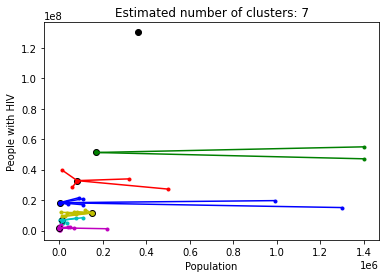

In [ ]:
#PLOTTING
plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = z[cluster_centers_indices[k]]
    plt.plot(z[class_members, 1], z[class_members, 0], col + ".")
    plt.plot(
        cluster_center[1],
        cluster_center[0],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
    for x in z[class_members]:
        plt.plot([cluster_center[1], x[1]], [cluster_center[0], x[0]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel("Population")
plt.ylabel("People with HIV")
plt.show()
plt.show()

#REFERENCE THAT I USED:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
print("David_bouldin_score: ",davies_bouldin_score(X, labels))
print("Silhoutte_score: ", silhouette_score(X, labels))
print("Calinski_harabasz_score: ",calinski_harabasz_score(X, labels))

David_bouldin_score:  0.33496897677501813
Silhoutte_score:  0.616597418120061
Calinski_harabasz_score:  765.0686225928522
